# Generating 200 inmaps

In [2]:
import shutil

def copy_files(source_prefix, num_files, num_copies):
    for i in range(1, num_copies + 1):
        for j in range(1, num_files + 1):
            source_file = f"{source_prefix:08}.{j:03d}"
            dest_file = f"{source_prefix:08}.{j + 20 * i:03d}"
            shutil.copyfile(source_file, dest_file)
            print(f"Copied {source_file} to {dest_file}")

In [ ]:
os.chdir('/mnt/c/Github/wflow/examples/wflow_maas_topoflex/inmaps')


# Define parameters
file_prefixes = ["P", "PET", "TEMP"]
num_files = 20
num_copies = 10  # Change this value according to your requirement

# Copy files for each prefix
for prefix in file_prefixes:
    copy_files(prefix, num_files, num_copies)
    
os.chdir('/mnt/c/Github/wflow/')
os.getcwd()

In [5]:
import os
import shutil

os.chdir('/mnt/c/Github/wflow/')
os.getcwd()

'/mnt/c/Github/wflow'

# Test: Alternating inmaps filename pattern to match with my tofuflex case

In [9]:
# Directory containing the files
in_directory = '/mnt/c/Github/wflow/examples/wflow_maas_topoflex/inmaps_ts'
out_directory = '/mnt/c/Github/wflow/examples/wflow_maas_topoflex/inmaps_datetime'

if not os.path.exists(out_directory):
    os.makedirs(out_directory)

# Iterate through each file in the directory
for filename in os.listdir(in_directory):
    if filename.startswith("P") or filename.startswith("PET"):
        # Extract the timestep from the filename
        timestep = int(filename.split('.')[1])

        # Calculate the date and hour
        year = 2011
        month = 9
        day = 1
        hour = timestep % 24  # Wrap around the hour to 0-23 range

        # If timestep is not in the range of 0-23, adjust the date
        if timestep >= 24:
            day += timestep // 24  # Update the day

        # Format the new filename
        new_filename = f"{filename.split('.')[0]}_{year}{month:02d}{day:02d}{hour:02d}"

        # Copy the file
        shutil.copyfile(os.path.join(in_directory, filename), os.path.join(out_directory, new_filename))

# Trying to understand how wflow dynamic model handles the timestep and datetime conversion

In [34]:
import datetime

datetimestart = datetime.datetime(2011, 9, 1)

firstTimestep = 1
lastTimeStep =  200

#firstTimestep = datetime.datetime(2011, 9, 1)
#lastTimeStep =  datetime.datetime(2011, 9, 9)

timestepsecs = 3600

print(lastTimeStep)
#datetime.timedelta(datetime.seconds=(lastTimeStep - firstTimestep) * timestepsecs)


200


In [55]:
if isinstance(lastTimeStep, datetime.datetime) and isinstance(firstTimestep, datetime.datetime):
    # If both lastTimeStep and firstTimestep are datetime objects
    time_difference_seconds = (lastTimeStep - firstTimestep).total_seconds()
else:
    # If either lastTimeStep or firstTimestep is an integer
    time_difference_seconds = (lastTimeStep - firstTimestep) * timestepsecs

# Calculate the new datetime
dte = datetimestart + datetime.timedelta(seconds=time_difference_seconds)
print(time_difference_seconds, " and ", dte)

716400  and  2011-09-09 07:00:00


In [37]:
dte = datetimestart + datetime.timedelta(seconds=(lastTimeStep - firstTimestep) * timestepsecs)
print(dte)

2011-09-09 07:00:00


In [11]:
import datetime
datetimestart=datetime.datetime(2010, 1, 1, 0),
datetimeend= datetime.datetime(1990, 1, 5, 23),

x = runDateTimeInfo(datetimestart=dt.datetime(2010, 10, 1, 0),
        datetimeend=dt.datetime(2010, 10, 1, 23),
        timestepsecs=3600,
        mode="mode",
        currentTimeStep=1)

print(x)
x.update(runStartTime=datetime.datetime(2010, 10, 1, 0, 1))
x.update(currentTimeStep=0)
print(x)

{'runStartTime': datetime.datetime(2010, 10, 1, 0, 0), 'runEndTime': datetime.datetime(2010, 10, 1, 23, 0), 'timeStepSecs': 3600, 'currentTimeStep': 0, 'lastTimeStep': 23.0, 'startadjusted': 0, 'startendadjusted': 0, 'currentmode': 'mode', 'callstopupdate': 0, 'runStateTime': datetime.datetime(2010, 10, 1, 0, 0), 'setByBMI': False, 'currentDateTime': datetime.datetime(2010, 10, 1, 0, 0), 'outPutStartTime': datetime.datetime(2010, 10, 1, 1, 0), 'runTimeSteps': 23.0, 'currentMonth': 10, 'currentYday': 274, 'currentHour': 0, 'nextDateTime': datetime.datetime(2010, 10, 1, 1, 0)}


TypeError: runDateTimeInfo.update() got an unexpected keyword argument 'runStartTime'

In [4]:
import datetime
import calendar

class runDateTimeInfo:
    """
    class to maintain and retrieve date/time info of the model run.  IN order to support
    difefrent views on date/time the class supports both a step (each input time is timestep) and
    an interval base method (each model timestep is the interval between two input timesteps)

    """

    def __init__(
        self,
        datetimestart=dt.datetime(1990, 1, 1),
        datetimeend=dt.datetime(1990, 1, 5),
        timestepsecs=86400,
        mode="steps",
        currentTimeStep = 0

    ):
        self.runStartTime = datetimestart
        self.runEndTime = datetimeend
        self.timeStepSecs = timestepsecs
        self.currentTimeStep = 0
        self.lastTimeStep = 0
        self.startadjusted = 0
        self.startendadjusted = 0
        self.currentmode = mode
        self.callstopupdate = 0

        if mode == "steps":
            self.runStateTime = self.runStartTime - datetime.timedelta(
                seconds=self.timeStepSecs
            )
        else:
            self.runStateTime = self.runStartTime

        self.setByBMI = False
        self.currentDateTime = self.runStateTime
        self.outPutStartTime = self.runStateTime + datetime.timedelta(
            seconds=self.timeStepSecs
        )
        self.runTimeSteps = (
            calendar.timegm(self.runEndTime.utctimetuple())
            - calendar.timegm(self.runStateTime.utctimetuple())
        ) / self.timeStepSecs
        self.currentMonth = self.currentDateTime.month
        self.currentYday = self.currentDateTime.timetuple().tm_yday
        self.currentHour = self.currentDateTime.hour
        self.nextDateTime = self.currentDateTime + datetime.timedelta(
            seconds=self.timeStepSecs
        )
        self.lastTimeStep = self.runTimeSteps + self.currentTimeStep

    def __str__(self):
        a = self.__dict__

        return str(a)

    def update(
        self,
        timestepsecs=None,
        datetimestart=None,
        datetimeend=None,
        currentTimeStep=None,
        currentDatetime=None,
        runTimeSteps=None,
        mode="steps",
        incrementStep=False,
        setByBMI=False,
    ):
        """
        Updates the content of the framework date/time object. Use only one input parameter per call. or runTimeSteps and datatimestart at the same time
        use the mode option to switch between steps and intervals ('steps' or 'intervals')

        :param timestepsecs:
        :param datetimestart: data time start of the input data
        :param datetimeend:
        :param currentTimeStep:
        :param currentDatetime:
        :return:
        """
        self.currentmode = mode
        self.callstopupdate = self.callstopupdate + 1

        if setByBMI:
            self.setByBMI = True
        if timestepsecs and not runTimeSteps:
            self.timeStepSecs = timestepsecs
            self.runTimeSteps = (
                calendar.timegm(self.runEndTime.utctimetuple())
                - calendar.timegm(self.runStateTime.utctimetuple())
            ) / self.timeStepSecs

            if self.currentmode == "steps":
                self.runStateTime = self.runStartTime - datetime.timedelta(
                    seconds=self.timeStepSecs
                )

            self.outPutStartTime = self.runStateTime + datetime.timedelta(
                seconds=self.timeStepSecs
            )
        elif timestepsecs and runTimeSteps:
            self.timeStepSecs = timestepsecs
            self.runTimeSteps = runTimeSteps

        if datetimestart:
            self.currentTimeStep = 1

            # if self.startadjusted
            if self.currentmode == "steps":
                self.runStartTime = datetimestart
                self.startadjusted = 0
                self.runStateTime = self.runStartTime - datetime.timedelta(
                    seconds=self.timeStepSecs
                )
            else:
                # self.runStartTime = datetimestart + datetime.timedelta(seconds=self.timeStepSecs)
                self.runStartTime = (
                    datetimestart
                )  # + datetime.timedelta(seconds=self.timeStepSecs)
                self.startadjusted = 1
                self.runStateTime = (
                    self.runStartTime
                )  # - datetime.timedelta(seconds=self.timeStepSecs)

            self.currentDateTime = self.runStateTime
            self.outPutStartTime = self.currentDateTime + datetime.timedelta(
                seconds=self.timeStepSecs
            )
            self.runTimeSteps = (
                calendar.timegm(self.runEndTime.utctimetuple())
                - calendar.timegm(self.runStateTime.utctimetuple())
            ) / self.timeStepSecs

            if self.runTimeSteps < 1:  # End time before start time
                self.runTimeSteps = 1
                self.runEndTime = self.runStateTime + datetime.timedelta(
                    seconds=self.timeStepSecs * self.runTimeSteps
                )

        if datetimestart and runTimeSteps:

            self.currentTimeStep = 1
            self.currentDateTime = self.runStartTime
            if self.currentmode == "steps":
                self.runStartTime = datetimestart
                self.startadjusted = 0
                self.runStateTime = self.runStartTime - datetime.timedelta(
                    seconds=self.timeStepSecs
                )
            else:
                self.runStartTime = (
                    datetimestart
                )  # + datetime.timedelta(seconds=self.timeStepSecs)
                self.startadjusted = 1
                self.runStateTime = self.runStartTime

            self.outPutStartTime = self.runStateTime + datetime.timedelta(
                seconds=self.timeStepSecs
            )
            self.currentDateTime = self.runStartTime
            self.runEndTime = self.runStateTime + datetime.timedelta(
                seconds=self.timeStepSecs * runTimeSteps
            )

        if datetimeend:
            self.runEndTime = datetimeend
            self.runTimeSteps = (
                calendar.timegm(self.runEndTime.utctimetuple())
                - calendar.timegm(self.runStateTime.utctimetuple())
            ) / self.timeStepSecs
            if self.runTimeSteps < 1:  # End time before start time
                self.runTimeSteps = 1
                self.runStartTime = self.runEndTime - datetime.timedelta(
                    seconds=self.timeStepSecs * self.runTimeSteps
                )

        if currentTimeStep and currentTimeStep != self.currentTimeStep:
            self.currentTimeStep = currentTimeStep
            self.currentDateTime = self.runStateTime + datetime.timedelta(
                seconds=self.timeStepSecs * (self.currentTimeStep - 1)
            )

        if incrementStep:
            self.currentTimeStep = self.currentTimeStep + 1
            self.currentDateTime = self.currentDateTime + datetime.timedelta(
                seconds=self.timeStepSecs
            )

        if currentDatetime:
            self.currentDateTime = currentDatetime
            self.currentTimeStep = (
                calendar.timegm(self.currentDateTime.utctimetuple())
                - calendar.timegm(self.runStateTime.utctimetuple())
            ) / self.timeStepSecs + 1

        self.nextDateTime = self.currentDateTime + datetime.timedelta(
            seconds=self.timeStepSecs
        )
        self.lastTimeStep = self.runTimeSteps
        self.currentMonth = self.currentDateTime.month
        self.currentYday = self.currentDateTime.timetuple().tm_yday
        self.currentHour = self.currentDateTime.hour

# Testing if wflow truly can handle resolution difference between inmaps and staticmaps...

In [1]:
import os
import shutil
import pcraster as pcr

os.chdir('/mnt/c/Workspace/Ch3/wflow_models/')
os.getcwd()

ws_name = "san-diego_california_20331196_11023340"
static_dir = str("/mnt/c/Workspace/Ch3/wflow_models/" + ws_name +  "/staticmaps/")

In [2]:
#dem30 = pcr.readmap(str(static_dir + "DEM_30m.map"))
dem90 = pcr.readmap(str(static_dir + "DEM_90m.map"))


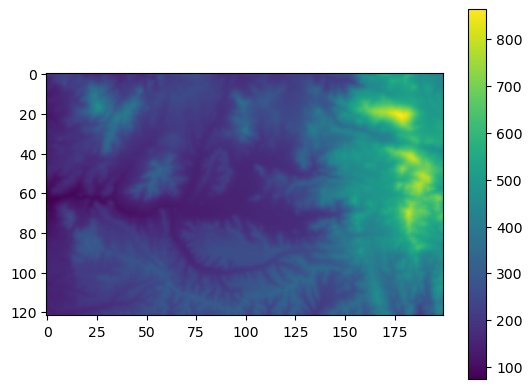

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(pcr.pcr2numpy(dem90,np.nan))
plt.colorbar()


In [8]:
import matplotlib.pyplot as plt
import numpy as np

clim = pcr.readmap(str(static_dir + "PET_2017083123.map"))
#plt.imshow(pcr.pcr2numpy(clim, np.nan))
#plt.colorbar()

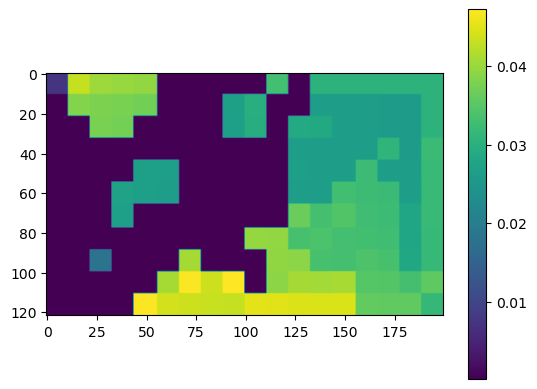

In [9]:
plt.imshow(pcr.pcr2numpy(clim, np.nan))
plt.colorbar()

In [10]:
test = clim * dem90

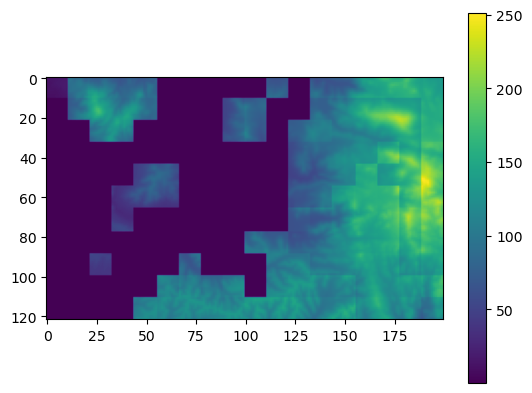

In [12]:
test = test * 10
plt.imshow(pcr.pcr2numpy(test, np.nan))
plt.colorbar()

In [4]:
import subprocess
# Construct the resample command with nearest neighbor option
command = ["resample", str(static_dir + "PET_2011090101.map"), str(static_dir + "test_resample.map"), "--clone", str(static_dir + "DEM_90m.map")]

# Execute the command using subprocess
subprocess.run(command)
#x = pcr.resample(dem30, dem90)

resample version: 4.4.0 (linux/x86_64)


CompletedProcess(args=['resample', '/mnt/c/Workspace/Ch3/wflow_models/san-diego_california_20331196_11023340/staticmaps/PET_2011090101.map', '/mnt/c/Workspace/Ch3/wflow_models/san-diego_california_20331196_11023340/staticmaps/test_resample.map', '--clone', '/mnt/c/Workspace/Ch3/wflow_models/san-diego_california_20331196_11023340/staticmaps/DEM_90m.map'], returncode=0)

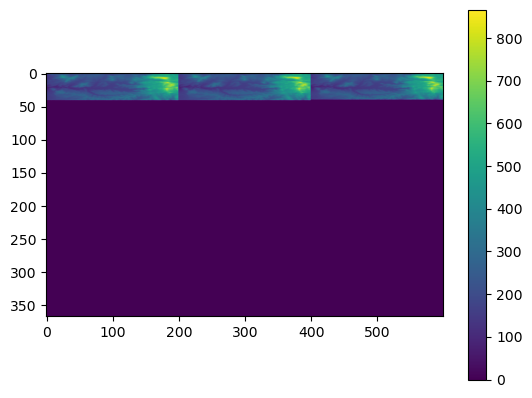

In [22]:
dem90 = pcr.readmap(str(static_dir + "test_resample.map"))
plt.imshow(pcr.pcr2numpy(dem90,np.nan))
plt.colorbar()

# insate

In [25]:
import os
import pcraster as pcr

wsName = "fulton_georgia_2047963_02336410"

instate_names = ['Qstate.map', 'Qeiastate.map',
                 'SiW.map','SiH.map', 'SiP.map',
                 'SwW.map','SwH.map', 'SwP.map',
                 'SaW.map','SaH.map', 'SaP.map',
                 'SuW.map','SuH.map', 'SuP.map',
                 'SfW.map','SfH.map', 'SfP.map', 'SfaP.map',
                 'Ss.map', 'WaterLevel.map'
                ]

static_dir = str("/mnt/c/Workspace/Ch3/wflow_models/" + wsName +  "/staticmaps/")
instate_dir = str("/mnt/c/Workspace/Ch3/wflow_models/" + wsName +  "/instate/")

demfilename = "wflow_subcatch.map"
dem_dir = os.path.join(static_dir, demfilename)
dem = pcr.readmap(dem_dir)

pcr.setclone(dem_dir)


for i in instate_names:
    print(i)
    temp = 0.0 * pcr.scalar(dem)
    output_path = os.path.join(instate_dir, i)
    pcr.report(pcr.scalar(temp), output_path)

Qstate.map
Qeiastate.map
SiW.map
SiH.map
SiP.map
SwW.map
SwH.map
SwP.map
SaW.map
SaH.map
SaP.map
SuW.map
SuH.map
SuP.map
SfW.map
SfH.map
SfP.map
SfaP.map
Ss.map
WaterLevel.map


In [1]:
import os
import pcraster as pcr

ws_name = "san-diego_california_20331196_11023340"

static_dir = str("/mnt/c/Workspace/Ch3/wflow_models/" + ws_name +  "/staticmaps/")

scfilename = "wflow_subcatch.map"
sc_dir = str(static_dir + scfilename)
sc = pcr.readmap(sc_dir)

ws = 0.0 * pcr.scalar(sc) + 1.0
pcr.report(pcr.nominal(ws), static_dir + "/wflow_ws.map")